In [1]:
STUD = 1032182533
def variant(stud):
    return f'Вариант: {stud%70+1}'
variant(STUD)

'Вариант: 54'

Постройте график распространения рекламы, математическая модель которой описывается следующим уравнением:

1. $\frac{\partial n}{\partial t} = (0.64 + 0.00004n(t))(N - n(t))$
2. $\frac{\partial n}{\partial t} = (0.00007 + 0.7n(t))(N - n(t))$
3. $\frac{\partial n}{\partial t} = (0.4 + 0.3sin(2t)n(t))(N - n(t))$

При этом объем аудитории $N$ = 1403, в начальный момент о товаре знает 9 человек.
Для случая 2 определите в какой момент времени скорость распространения рекламы будет иметь максимальное значение.

# Код

In [2]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
x0 = 9 # количество людей, знающих о товаре в начальный момент времени

In [4]:
N = 1403 # максимальное количество людей, которых может заинтересовать товар

In [5]:
t = np.arange(0, 10, 0.01) # временной промежуток (длительность рекламной компании)

In [6]:
# функция, отвечающая за платную рекламу
def k1():
    g = 0.64
    return g

def k2():
    g = 0.00007
    return g

def k3(t):
    g = 0.4*t
    return g


In [7]:
# функция, описывающая сарафанное радио
def p1():
    v = 0.00004
    return v

def p2():
    v = 0.7
    return v

def p3(t):
    v = 0.3*np.sin(2*t)
    return v


In [8]:
# уравнение, описывающее распространение рекламы

def f1(x, t):
    xd1 = ( k1() + p1()*x )*( N - x )
    return xd1

def f2(x, t):
    xd2 = ( k2() + p2()*x )*( N - x )
    return xd2

def f3(x, t):
    xd3 = ( k3(t) + p3(t)*x )*( N - x )
    return xd3


In [9]:
# решение ОДУ
x1 = odeint(f1, x0, t)
x2 = odeint(f2, x0, t)
x3 = odeint(f3, x0, t)

In [19]:
# Момент, при котором скорость распространения рекламы будет иметь максимальное значение 
t[np.argmax(x2[1:].reshape(1,999)/t[1:]) + 1]

0.01

### $$ \alpha_1(t) > \alpha_2(t) $$

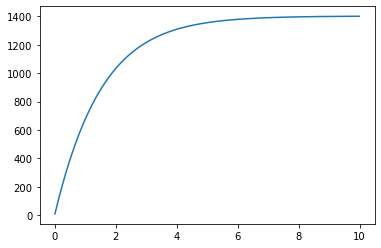

In [10]:
plt.plot(t, x1) # случай 1

### $$ \alpha_1(t) < \alpha_2(t) $$

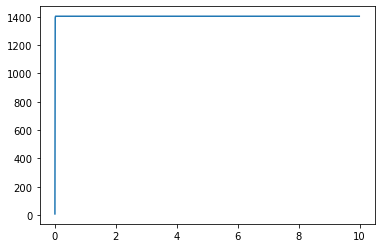

In [11]:
plt.plot(t, x2) # случай 2

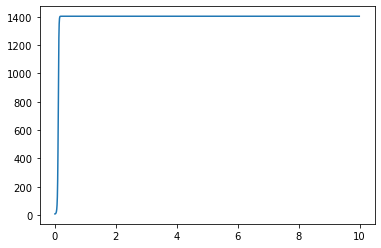

In [12]:
plt.plot(t, x3) # случай 3

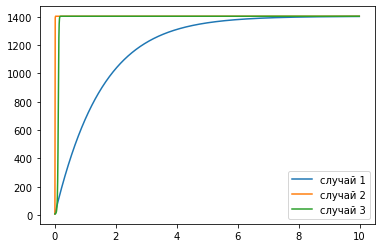

In [13]:
plt.plot(t, x1, label='случай 1') # случай 1
plt.plot(t, x2, label='случай 2') # случай 2
plt.plot(t, x3, label='случай 3') # случай 3
plt.legend()

# Вопросы

### 1. Записать модель Мальтуса (дать пояснение, где используется данная модель)

Демографическая модель  
Скорость роста пропорциональна текущему размеру популяции
$$ \frac{\partial x}{\partial t} = {\alpha}x $$

где $x$ — исходная численность населения, ${\alpha}$ — некоторый параметр, определяемый разностью между рождаемостью и смертностью. $t$ — время.

### 2. Записать уравнение логистической кривой (дать пояснение, что описывает данное уравнение)

$$ \frac{\partial x}{\partial t} = {\alpha}(1 - \frac{x}{x_s})x $$

где ${x_s}$ - «равновесный» размер популяции, при котором рождаемость в точности компенсируется смертностью. Размер популяции в такой модели стремится к равновесному значению ${x_s}$, причем такое поведение структурно устойчиво.  
Данное уравнение описывает рождаемость и смертность с учетом роста численности.

### 3. На что влияет коэффициент $\alpha_1(t)$ и $\alpha_2(t)$ в модели распространения рекламы

$\alpha_1(t)$ — интенсивность рекламной кампании, зависящая от затрат

$\alpha_2(t)$ — интенсивность рекламной кампании, зависящая от сарафанного радио.

### 4. Как ведет себя рассматриваемая модель при $\alpha_1(t) \gg \alpha_2(t)$

При $\alpha_1(t) \gg \alpha_2(t)$ получается модель типа модели Мальтуса.

$$ \frac{\partial x}{\partial t} = {\alpha}x $$


### 5. Как ведет себя рассматриваемая модель при $\alpha_1(t) \ll \alpha_2(t)$

При $\alpha_1(t) \ll \alpha_2(t)$ получаем уравнение логистической кривой:

$$ \frac{\partial x}{\partial t} = {\alpha}(1 - \frac{x}{x_s})x $$